## Predict house price with given input features

### We will use Graphlab Create for run the models

In [1]:
import graphlab

#### Load the dataset

In [2]:
sales = graphlab.SFrame('home_data.gl/')

This non-commercial license of GraphLab Create for academic use is assigned to soubhik.dd2015@cs.iiests.ac.in and will expire on August 22, 2017.


[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: C:\Users\soubhik\AppData\Local\Temp\graphlab_server_1487042841.log.0


#### Lets look at the dataset

In [3]:
sales

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront
7129300520,2014-10-13 00:00:00+00:00,221900,3,1,1180,5650,1,0
6414100192,2014-12-09 00:00:00+00:00,538000,3,2.25,2570,7242,2,0
5631500400,2015-02-25 00:00:00+00:00,180000,2,1,770,10000,1,0
2487200875,2014-12-09 00:00:00+00:00,604000,4,3,1960,5000,1,0
1954400510,2015-02-18 00:00:00+00:00,510000,3,2,1680,8080,1,0
7237550310,2014-05-12 00:00:00+00:00,1225000,4,4.5,5420,101930,1,0
1321400060,2014-06-27 00:00:00+00:00,257500,3,2.25,1715,6819,2,0
2008000270,2015-01-15 00:00:00+00:00,291850,3,1.5,1060,9711,1,0
2414600126,2015-04-15 00:00:00+00:00,229500,3,1,1780,7470,1,0
3793500160,2015-03-12 00:00:00+00:00,323000,3,2.5,1890,6560,2,0


Lets make the output of the graphs to be in the notebook itself and finally lets see the correlation between 'Living area in sqft' with the 'Price'.

In [4]:
graphlab.canvas.set_target('ipynb')
sales.show(view="Scatter Plot", x="sqft_living", y="price")

Next, we create a simple regression model based on the above graph to predict house price based on only the 'sqft_living' feature.

We split the sales data into train and test data in the ratio 4:1.

In [5]:
train_data,test_data = sales.random_split(.8,seed=0)

We build the model using Graphlab's built in linear regression model.

In [6]:
sqft_model = graphlab.linear_regression.create(train_data, target='price', features=['sqft_living'],validation_set=None)

Linear regression:

--------------------------------------------------------

Number of examples          : 17384

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |

+-----------+----------+--------------+--------------------+---------------+

| 1         | 2        | 1.011146     | 4349521.926170     | 262943.613754 |

+-----------+----------+--------------+--------------------+---------------+

SUCCESS: Optimal solution found.

We evaluate on the test data to find the errors of this model.

**max_error** - Maximum error for the points in the test dataset.

**rmse** - Root mean square error of all the points in the test dataset

In [7]:
print sqft_model.evaluate(test_data)

{'max_error': 4143550.8825285938, 'rmse': 255191.02870527358}


We plot our linear regression model.

<IPython.core.display.Javascript object>


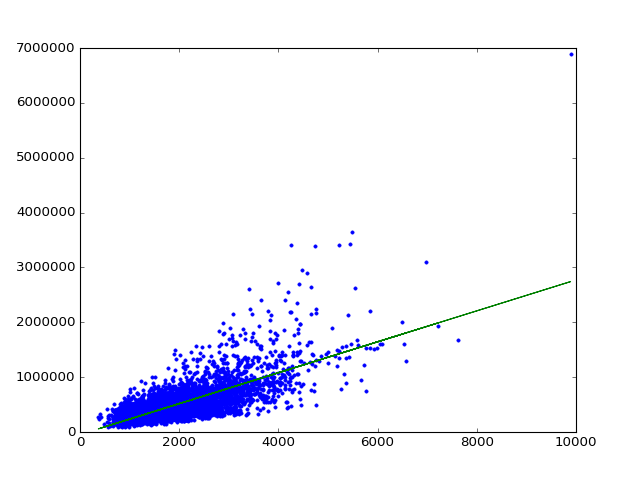

In [9]:
import matplotlib.pyplot as plt
%matplotlib notebook

plt.plot(test_data['sqft_living'],test_data['price'],'.',test_data['sqft_living'],sqft_model.predict(test_data),'-')

Blue dots are original data, green line is the prediction from the simple regression.

In [8]:
sqft_model.get('coefficients')

name,index,value,stderr
(intercept),None,-47114.0206702,4923.34437753
sqft_living,None,281.957850166,2.16405465323


We can see the learned regression coefficients namely, the slope and the intercept.

This was just a simple regression model using *sqft_living* as input and *price* as output.

### Lets use more features as input and create a multiple regression model.

In [10]:
my_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']

In [11]:
my_features_model = graphlab.linear_regression.create(train_data,target='price',features=my_features,validation_set=None)

Linear regression:

--------------------------------------------------------

Number of examples          : 17384

Number of features          : 6

Number of unpacked features : 6

Number of coefficients    : 115

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |

+-----------+----------+--------------+--------------------+---------------+

| 1         | 2        | 0.060126     | 3763208.270523     | 181908.848367 |

+-----------+----------+--------------+--------------------+---------------+

SUCCESS: Optimal solution found.

### Lets create another advanced model using much more features as input

In [12]:
advanced_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode', 'condition', 'grade',
                    'waterfront', 'view', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
                    'sqft_living15', 'sqft_lot15']

In [13]:
advanced_features_model = graphlab.linear_regression.create(train_data,target='price',
                                                            features=advanced_features, validation_set=None)

Linear regression:

--------------------------------------------------------

Number of examples          : 17384

Number of features          : 18

Number of unpacked features : 18

Number of coefficients    : 127

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |

+-----------+----------+--------------+--------------------+---------------+

| 1         | 2        | 0.189277     | 3469012.450686     | 154580.940736 |

+-----------+----------+--------------+--------------------+---------------+

SUCCESS: Optimal solution found.

### Lets compare the results.

In [14]:
print sqft_model.evaluate(test_data)
print my_features_model.evaluate(test_data)
print advanced_features_model.evaluate(test_data)

{'max_error': 4143550.8825285938, 'rmse': 255191.02870527358}
{'max_error': 3486584.509381705, 'rmse': 179542.4333126903}
{'max_error': 3556849.413858208, 'rmse': 156831.1168021901}


The *rmse* decreases with the increase in complexity of the model

#### Now we apply the learned models to predict the price of some houses in the dataset

In [15]:
house1 = sales[sales['id']=='5309101200']

Lets take a look at the house.

In [16]:
house1

Columns:
	id	str
	date	datetime
	price	int
	bedrooms	str
	bathrooms	str
	sqft_living	int
	sqft_lot	int
	floors	str
	waterfront	int
	view	int
	condition	int
	grade	int
	sqft_above	int
	sqft_basement	int
	yr_built	int
	yr_renovated	int
	zipcode	str
	lat	float
	long	float
	sqft_living15	float
	sqft_lot15	float

Rows: Unknown

Data:
+------------+---------------------------+--------+----------+-----------+-------------+
|     id     |            date           | price  | bedrooms | bathrooms | sqft_living |
+------------+---------------------------+--------+----------+-----------+-------------+
| 5309101200 | 2014-06-05 00:00:00+00:00 | 620000 |    4     |    2.25   |     2400    |
+------------+---------------------------+--------+----------+-----------+-------------+
+----------+--------+------------+------+-----------+-------+------------+---------------+
| sqft_lot | floors | waterfront | view | condition | grade | sqft_above | sqft_basement |
+----------+--------+------------+------+-----------+-------+------------+---------------+
|   5350   |  1.5   |     0      |  0   |     4     |   7   |    1460    |      940      |
+----------+--------+------------+------+-----------+-------+------------+---------------+
+----------+--------------+---------+-------------+---------------+---------------+-----+
| yr_built | yr_renovated | zipcode |     lat     |      long     | sqft_living15 | ... |
+----------+--------------+---------+-------------+---------------+---------------+-----+
|   1929   |      0       |  98117  | 47.67632376 | -122.37010126 |     1250.0    | ... |
+----------+--------------+---------+-------------+---------------+---------------+-----+
[? rows x 21 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use sf.materialize() to force materialization.

In [17]:
print house1['price']

[620000, ... ]


In [18]:
print sqft_model.predict(house1)

[629584.8197281545]


In [19]:
print my_features_model.predict(house1)

[721918.9333272863]


In this case, the model with more features provides a worse prediction than the simpler model with only 1 feature. However, on average, the model with more features is better.

#### Lets look at a second house

In [20]:
house2 = sales[sales['id']=='1925069082']

In [21]:
house2

Columns:
	id	str
	date	datetime
	price	int
	bedrooms	str
	bathrooms	str
	sqft_living	int
	sqft_lot	int
	floors	str
	waterfront	int
	view	int
	condition	int
	grade	int
	sqft_above	int
	sqft_basement	int
	yr_built	int
	yr_renovated	int
	zipcode	str
	lat	float
	long	float
	sqft_living15	float
	sqft_lot15	float

Rows: Unknown

Data:
+------------+---------------------------+---------+----------+-----------+-------------+
|     id     |            date           |  price  | bedrooms | bathrooms | sqft_living |
+------------+---------------------------+---------+----------+-----------+-------------+
| 1925069082 | 2015-05-11 00:00:00+00:00 | 2200000 |    5     |    4.25   |     4640    |
+------------+---------------------------+---------+----------+-----------+-------------+
+----------+--------+------------+------+-----------+-------+------------+---------------+
| sqft_lot | floors | waterfront | view | condition | grade | sqft_above | sqft_basement |
+----------+--------+------------+------+-----------+-------+------------+---------------+
|  22703   |   2    |     1      |  4   |     5     |   8   |    2860    |      1780     |
+----------+--------+------------+------+-----------+-------+------------+---------------+
+----------+--------------+---------+-------------+---------------+---------------+-----+
| yr_built | yr_renovated | zipcode |     lat     |      long     | sqft_living15 | ... |
+----------+--------------+---------+-------------+---------------+---------------+-----+
|   1952   |      0       |  98052  | 47.63925783 | -122.09722322 |     3140.0    | ... |
+----------+--------------+---------+-------------+---------------+---------------+-----+
[? rows x 21 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use sf.materialize() to force materialization.

In [22]:
print house2['price']

[2200000, ... ]


In [23]:
print sqft_model.predict(house2)

[1261170.404099968]


In [24]:
print my_features_model.predict(house2)

[1446472.4690774973]


In this case, the model with more features provides a better prediction. This behavior is expected here, because this house is more differentiated by features that go beyond its square feet of living space, especially the fact that it's a waterfront house.

### Lets look at another house, namely Bill Gates' house

In [26]:
bill_gates = {'bedrooms':[8], 
              'bathrooms':[25], 
              'sqft_living':[50000], 
              'sqft_lot':[225000],
              'floors':[4], 
              'zipcode':['98039'], 
              'condition':[10], 
              'grade':[10],
              'waterfront':[1],
              'view':[4],
              'sqft_above':[37500],
              'sqft_basement':[12500],
              'yr_built':[1994],
              'yr_renovated':[2010],
              'lat':[47.627606],
              'long':[-122.242054],
              'sqft_living15':[5000],
              'sqft_lot15':[40000]}

In [27]:
print my_features_model.predict(graphlab.SFrame(bill_gates))

[13749825.525719076]


Hmm, we expect Bill Gates' house to be more expensive, but since there are not enough examples of such house in the dataset, we get a **low** value.